In [1]:
import pickle
import numpy as np

In [2]:
with open('../TextFiles/train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('../TextFiles/test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [4]:
len(test_data)

1000

In [5]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [6]:
all_data = test_data + train_data

In [7]:
len(all_data)

11000

In [8]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [9]:
vocab = set()

for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [10]:
vocab.add('no')

In [11]:
vocab.add('yes')

In [12]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [13]:
vocab_len = len(vocab) + 1

In [14]:
vocab_len

38

In [15]:
max_story_len = max([len(data[0]) for data in all_data])

In [16]:
max_story_len

156

In [17]:
max_question_len = max([len(data[1]) for data in all_data])

In [18]:
max_question_len

6

In [19]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [20]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [21]:
tokenizer.word_index

{'bathroom': 1,
 'football': 2,
 'grabbed': 3,
 'to': 4,
 'back': 5,
 'left': 6,
 '?': 7,
 'there': 8,
 '.': 9,
 'mary': 10,
 'travelled': 11,
 'hallway': 12,
 'garden': 13,
 'discarded': 14,
 'down': 15,
 'office': 16,
 'no': 17,
 'john': 18,
 'the': 19,
 'bedroom': 20,
 'sandra': 21,
 'picked': 22,
 'in': 23,
 'moved': 24,
 'milk': 25,
 'yes': 26,
 'put': 27,
 'dropped': 28,
 'up': 29,
 'is': 30,
 'took': 31,
 'apple': 32,
 'got': 33,
 'daniel': 34,
 'went': 35,
 'journeyed': 36,
 'kitchen': 37}

In [22]:
train_story_text = []
train_question_text = []
train_answers = []

In [23]:
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [24]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [25]:
len(train_story_seq)

10000

In [26]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):
    
    X = []
    Xq = []
    Y = []
    
    for story, query, answer in data:
        
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index) + 1)
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [27]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [28]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [29]:
inputs_test

array([[ 0,  0,  0, ..., 19, 20,  9],
       [ 0,  0,  0, ..., 19, 13,  9],
       [ 0,  0,  0, ..., 19, 13,  9],
       ...,
       [ 0,  0,  0, ..., 19, 32,  9],
       [ 0,  0,  0, ..., 19, 13,  9],
       [ 0,  0,  0, ..., 32,  8,  9]], dtype=int32)

In [30]:
queries_test

array([[30, 18, 23, 19, 37,  7],
       [30, 18, 23, 19, 37,  7],
       [30, 18, 23, 19, 13,  7],
       ...,
       [30, 10, 23, 19, 20,  7],
       [30, 21, 23, 19, 13,  7],
       [30, 10, 23, 19, 13,  7]], dtype=int32)

In [31]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [33]:
from keras.models import Sequential, Model

In [34]:
from keras.layers import Embedding

In [35]:
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [36]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [37]:
vocab_size = len(vocab) + 1

In [38]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [39]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [40]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [42]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [43]:
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [44]:
response = add([match, input_encoded_c])
response = Permute((2, 1))(response)

In [45]:
answer = concatenate([response, question_encoded])

In [46]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [47]:
answer = LSTM(32)(answer)

In [48]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [49]:
answer = Activation('softmax')(answer)

In [50]:
model = Model([input_sequence, question], answer)

In [51]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
______________________________________________________________________________________________

In [62]:
history = model.fit([inputs_train, queries_train], answers_train, batch_size=32, epochs=100, validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6595 - accuracy: 0.5981 - val_loss: 0.6466 - val_accuracy: 0.6440
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6410 - accuracy: 0.6460 - val_loss: 0.6208 - val_accuracy: 0.6820
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6176 - accuracy: 0.6663 - val_loss: 0.6043 - val_accuracy: 0.6650
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5968 - accuracy: 0.6865 - val_loss: 0.5645 - val_accuracy: 0.7150
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5691 - accuracy: 0.7159 - val_loss: 0.5592 - val_accuracy: 0.7170
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5518 - accuracy: 0.7255 - val_loss: 0.5324 - val_accuracy: 0.7440
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5399 - accuracy: 0.7336 - val_loss: 0.5314 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


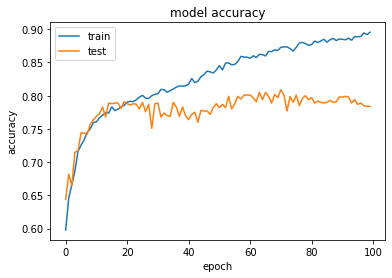

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
# model.save('mybrandnewmodel.h5')

In [65]:
pred_results = model.predict(([inputs_test, queries_test]))

In [66]:
' '.join(test_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [67]:
pred_results[0]

array([1.7975306e-14, 1.5814876e-14, 1.8337601e-14, 1.5245612e-14,
       1.9468590e-14, 1.8935764e-14, 1.9129214e-14, 1.6862549e-14,
       1.6440823e-14, 1.9621472e-14, 1.6000442e-14, 1.6475197e-14,
       1.4203293e-14, 1.9266527e-14, 1.5926879e-14, 1.4522348e-14,
       1.5921777e-14, 9.9954897e-01, 1.7148689e-14, 1.7853120e-14,
       1.9148269e-14, 1.4851176e-14, 1.6493747e-14, 1.4879814e-14,
       1.9225119e-14, 1.5796546e-14, 4.5104764e-04, 1.5492019e-14,
       1.6385974e-14, 1.6644367e-14, 1.8168679e-14, 1.5159898e-14,
       1.4500704e-14, 1.8530770e-14, 1.7391950e-14, 1.8872412e-14,
       1.6836387e-14, 1.7261444e-14], dtype=float32)

In [68]:
val_max = np.argmax(pred_results[0])

In [69]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [70]:
k

'no'

In [71]:
pred_results[0][val_max]

0.999549

In [115]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [116]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [117]:
my_question = "Is the football in the kitchen ?"

In [118]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'kitchen', '?']

In [122]:
mydata = [(my_story.split(), my_question.split(), 'yes')]

In [123]:
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'kitchen', '?'],
  'yes')]

In [124]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [125]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [126]:
pred_results = model.predict(([my_story, my_ques]))

In [127]:
pred_results

array([[1.28464565e-11, 1.28640119e-11, 1.21691155e-11, 1.14577150e-11,
        1.24446122e-11, 1.18399483e-11, 1.20281892e-11, 1.21928830e-11,
        1.20680826e-11, 1.26362228e-11, 1.13900816e-11, 1.14613223e-11,
        1.21583967e-11, 1.27814200e-11, 1.27965685e-11, 1.16216221e-11,
        1.28248636e-11, 9.20556605e-01, 1.11008147e-11, 1.28013286e-11,
        1.35868461e-11, 1.15770423e-11, 1.15015723e-11, 1.17029901e-11,
        1.26807688e-11, 1.33105393e-11, 7.94434100e-02, 1.20311270e-11,
        1.26953864e-11, 1.21746172e-11, 1.25841507e-11, 1.14246763e-11,
        1.17407525e-11, 1.17574709e-11, 1.17863228e-11, 1.31200849e-11,
        1.26846146e-11, 1.26220354e-11]], dtype=float32)

In [128]:
val_max = np.argmax(pred_results[0])

In [129]:
pred_results[0][val_max]

0.9205566

In [130]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [131]:
key

'kitchen'